matplotlib
- 분석 개요: 9시~9시20분
- 분석: 9시20분~오후4시30분
- 점심: 11시50분 ~ 오후 1시
- 발표: 4시30분~5시40분(인당 약 5~10분)

미니프로젝트 종류
- 타이타닉, pclass = passenger class
- 미국 태생 아이들 이름 분석(120년), 
- 의료데이터(사이트), 
- 자전거 대여 데이터, 
- 사회복지 데이터
- 졸음운전 교통사고 분석

- data.go.kr
- aihub.or.kr
- kaggle.com
- dacon.io
- 통계청 등 각 공공기관 open api

In [1]:
# 빈값을 채우기 위해...
# 중위수? 평균값? 같은 클래스의 값? 이전데이터의 값과 동일하게? 아니면 보간법?
# 이런 것들은 도메인 날리지(domain knowledge = 분야지식)이 필요함
# 데이터 삭제는 하지 않는 쪽으로...ㅎㅎ 그래도 공부하는 건데..

In [2]:
# 어떤 질병을 많이 진단받았는가, 
# 각 질병별 급여비용이 얼마인가? 
# 입내원일수가 질병별 어느정도고 심각한 입내원일수는 어떤 질병?
# 해가 지날수록 늘어나는가?
# 어느지역에 많이 분포되는가? 혹은 특정지역이 많이 분포되었으나 다른 지역이 특이점을 보이는가?
# 환자수가 어떤 변화를 보이는가?
# 성별로는 어떤 차이가 있는가?
# 비용은 어떤 추세인가?

# 연령대별 질병 분포 및 비용 분석:
# 연령대별로 특정 질병이 많이 발생하는지 확인.
# 연령대별 요양급여비용이 어떻게 다른지 분석.

# 환자수 대비 급여비용 비율:    환자수 대비 요양급여비용을 분석하여 비용 효율성을 평가.
# 치료 기간 분석:               각 질병별 평균 치료 기간을 계산하고, 치료 기간이 긴 질병을 파악.
# 성별 및 연령대별 질병 특성:   성별 및 연령대별로 특정 질병이 더 많이 진단되는지 파악.
# 특정 성별, 연령대에서 치료 비용이 더 많이 드는지 분석.
# 지역별 의료 자원 접근성: 특정 지역의 의료 자원 접근성이 질병 진단 및 치료에 미치는 영향을 분석.
# 사회경제적 요인 분석: 지역별 사회경제적 지표(예: 소득 수준, 교육 수준)와 질병 발생률 및 치료 비용 간의 상관관계를 분석.
# 의료정책 변화의 영향 분석: 특정 연도에 시행된 의료정책이 질병 진단 및 치료에 미친 영향을 분석.

# 데이터 시각화 아이디어
# 히트맵:       지역별 질병 발생 분포를 시각화하여 한눈에 지역별 특성을 파악.
# 트렌드 라인:  연도별 환자수, 급여비용, 입내원일수 등을 시각화하여 시간적 추세를 파악.
# 파이 차트:    성별, 연령대별 질병 분포를 시각화하여 각 그룹의 비율을 파악.
# 박스 플롯:    각 질병별 치료 비용의 분포를 시각화하여 비용의 변동성을 파악.
# 산점도:       입내원일수와 급여비용 간의 상관관계를 시각화하여 질병의 심각도와 비용 간의 관계를 파악.

<!-- 시군구 성별 연령별 주요 정신질환 통계 데이터 분석 -->
데이터셋 선정 이유
- 사회적인 현상에 대해서 관심이 있음
- 특히 사회가 발전하고 고령화가 진행되는 사회의 원인과 결과를 직접 해석하는 것에 의의를 둠
- 재밌어 보임.

진행내용
- 라이브러리 가져오기
- 데이터 가져오기
- 결측값 확인
- 
- 환자수 증가 추이
- 질병별 환자수 추이
- 질병별 환자 및 연령에 따른 비용 비교
- 성별에 따른 연령별 환자수 확인
- 연도와 지역에 따른 인구와 질환자 비율
- 치료 기간

# 라이브러리 가져오기

In [3]:
# https://opendata.hira.or.kr/op/opc/selectOpenData.do?sno=12800&publDataTpCd=&searchCnd=&searchWrd=&pageIndex=1
# https://www.data.go.kr/data/15118810/fileData.do
# 위 주소에서 다운로드하여 데이터 분석
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 한글깨짐 현상 방지 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

# 데이터 가져오기

In [5]:
df = pd.read_csv('mental/시군구 성별 연령별 주요 정실질환 통계 2018~2022.csv', encoding='cp949')
df.head()

,진료년도,상별구분,시도,시군구,성별,연령구분,환자수,입내원일수,요양급여비용
0,2018,ADHD,서울,강남구,남,0~9세,437,3330,188836790
1,2018,ADHD,서울,강남구,남,10~19세,1111,8869,563498480
2,2018,ADHD,서울,강남구,남,20~29세,456,3485,213248290
3,2018,ADHD,서울,강남구,남,30~39세,174,1357,72761750
4,2018,ADHD,서울,강남구,남,40~49세,55,357,21611080


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165000 entries, 0 to 164999
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   진료년도    165000 non-null  int64 
 1   상별구분    165000 non-null  object
 2   시도      165000 non-null  object
 3   시군구     165000 non-null  object
 4   성별      165000 non-null  object
 5   연령구분    165000 non-null  object
 6   환자수     165000 non-null  int64 
 7   입내원일수   165000 non-null  int64 
 8   요양급여비용  165000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 11.3+ MB


,진료년도,환자수,입내원일수,요양급여비용
count,165000.000000,165000.000000,165000.000000,1.650000e+05
mean,2020.000000,86.157673,621.043145,3.860845e+07
std,1.414218,193.002516,1406.831330,1.029413e+08
min,2018.000000,0.000000,0.000000,0.000000e+00
25%,2019.000000,0.000000,0.000000,0.000000e+00
50%,2020.000000,10.000000,21.000000,3.747500e+05
75%,2021.000000,79.000000,618.000000,3.038176e+07
max,2022.000000,6311.000000,48418.000000,5.132790e+09


# 결측값 확인

In [7]:
df.isnull().sum()

진료년도      0
상별구분      0
시도        0
시군구       0
성별        0
연령구분      0
환자수       0
입내원일수     0
요양급여비용    0
dtype: int64

In [8]:
df[df.연령구분 == '100세 이상'].sum() # 100세이상은 없음

진료년도                                               30300000
상별구분      ADHDADHDADHDADHDADHDADHDADHDADHDADHDADHDADHDAD...
시도        서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울서울...
시군구       강남구강남구강동구강동구강서구강서구관악구관악구구로구구로구도봉구도봉구동대문구동대문구동작...
성별        남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여남여...
연령구분      100세 이상100세 이상100세 이상100세 이상100세 이상100세 이상100세...
환자수                                                       0
입내원일수                                                     0
요양급여비용                                                    0
dtype: object

In [9]:
df = df[df.연령구분 != '100세 이상'] # 100세 이상의 데이터는 전부 제거
df

,진료년도,상별구분,시도,시군구,성별,연령구분,환자수,입내원일수,요양급여비용
0,2018,ADHD,서울,강남구,남,0~9세,437,3330,188836790
1,2018,ADHD,서울,강남구,남,10~19세,1111,8869,563498480
2,2018,ADHD,서울,강남구,남,20~29세,456,3485,213248290
3,2018,ADHD,서울,강남구,남,30~39세,174,1357,72761750
4,2018,ADHD,서울,강남구,남,40~49세,55,357,21611080
...,...,...,...,...,...,...,...,...,...
164994,2022,조현병,세종,세종시,여,50~59세,41,1647,125813150
164995,2022,조현병,세종,세종시,여,60~69세,29,597,40381390
164996,2022,조현병,세종,세종시,여,70~79세,13,550,39400730
164997,2022,조현병,세종,세종시,여,80~89세,0,0,0


# 매해 환자수 변화

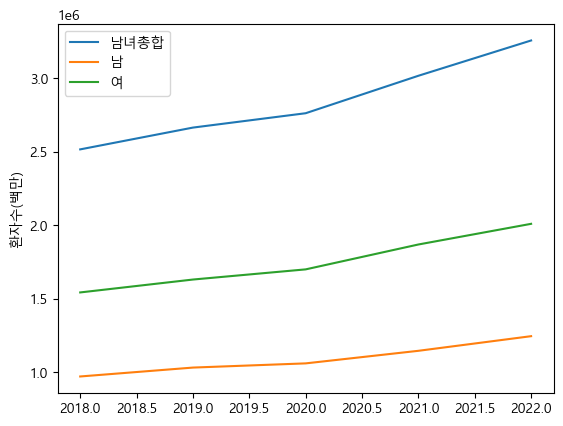

In [10]:
plt.plot(df.groupby('진료년도')['환자수'].sum())
plt.plot(df[df.성별 == '남'].groupby(['진료년도','성별'])[['환자수']].sum().unstack().loc[:,'환자수']['남'])
plt.plot(df[df.성별 == '여'].groupby(['진료년도','성별'])[['환자수']].sum().unstack().loc[:,'환자수']['여'])
plt.ylabel('환자수(백만)') # 남녀 총합
plt.legend(['남녀총합','남','여'])
plt.show()

- 매해마다 정신병 환자수가 늘어가고 있음
- 특히 여성의 경우는 생물학적으로 감성성이 강한 만큼 정신적인 스트레스에 약한 모습이 보인 것이 아닐까 생각됨. 
- 혹은 사회적으로 여성에 대한 차별이 부분적으로 존재할 수 있다는 것을 보이기도 함

# 정신질환 전체 환자수

In [11]:
df.groupby(df.상별구분)['환자수'].sum() # 18년도부터 22년도까지 우울증이 472만명으로 제일 많은 환자가 있음

상별구분
ADHD     502774
불면증     3549496
불안장애    4132425
우울증     4720207
조울증      620314
조현병      690800
Name: 환자수, dtype: int64

# 질병별 환자수 추이

In [12]:
df.groupby(df.상별구분)['환자수'].sum()

상별구분
ADHD     502774
불면증     3549496
불안장애    4132425
우울증     4720207
조울증      620314
조현병      690800
Name: 환자수, dtype: int64

In [13]:
year1 = df[df.진료년도 == 2018].groupby('상별구분')['환자수'].sum()
year2 = df[df.진료년도 == 2019].groupby('상별구분')['환자수'].sum()
year3 = df[df.진료년도 == 2020].groupby('상별구분')['환자수'].sum()
year4 = df[df.진료년도 == 2021].groupby('상별구분')['환자수'].sum()
year5 = df[df.진료년도 == 2022].groupby('상별구분')['환자수'].sum()
years = pd.concat([year1,year2,year3,year4,year5],axis=1)
years.columns = [2018,2019,2020,2021,2022]
years

,2018,2019,2020,2021,2022
상별구분,,,,,
ADHD,63501,78230,86969,113285,160789
불면증,643333,682383,704659,741920,777201
불안장애,740353,771898,798633,886414,935127
우울증,826611,877412,912375,1003855,1099954
조울증,104154,115756,122334,132906,145164
조현병,138314,138750,137062,138303,138371


In [14]:
total = years.sum().sum()
print(total)
years.sum()

14216016


2018    2516266
2019    2664429
2020    2762032
2021    3016683
2022    3256606
dtype: int64

In [15]:
years.loc['불면증',2018]/total

0.04525409932009081

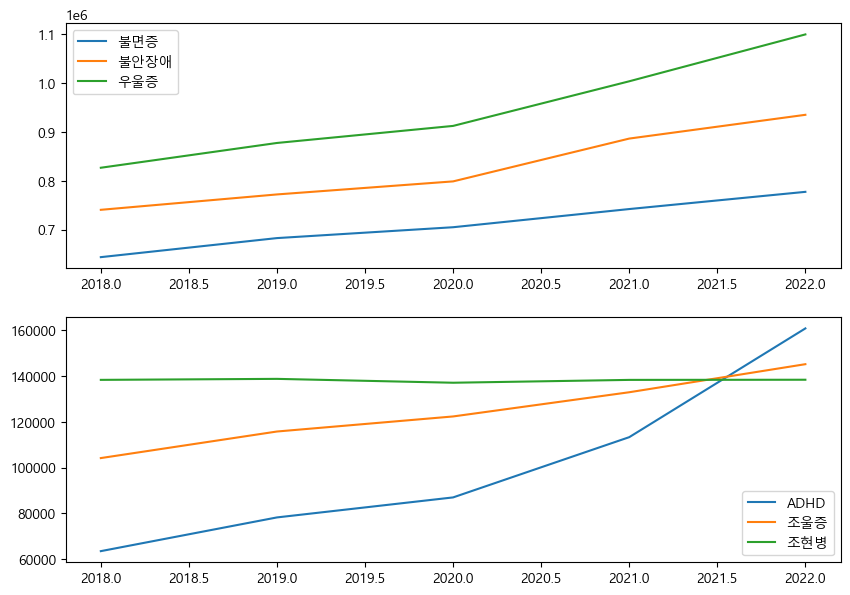

In [16]:
plt.figure(figsize=(10,7))
plt.subplot(211)
plt.plot(years.loc['불면증',:])
plt.plot(years.loc['불안장애',:])
plt.plot(years.loc['우울증',:])
plt.legend(['불면증','불안장애','우울증'])
plt.subplot(212)
plt.plot(years.loc['ADHD',:])  
plt.plot(years.loc['조울증',:])
plt.plot(years.loc['조현병',:])
plt.legend(['ADHD','조울증','조현병'])
plt.show()

- 조현병을 제외한 전체적인 정신병 환자수가 증가하는 추세에 있음
- 시기적으로 코로나19가 발생한 뒤로 전체적으로 정신적 스트레스가 커져서 이런 현상이 나타난 것이 아닌가 싶음.
- 특히 ADHD의 경우 활발한 상태로 지내던 사람들이 외출을 자제하는 상황이 생기면서 겉으로 드러나기 시작한 것으로 생각됨

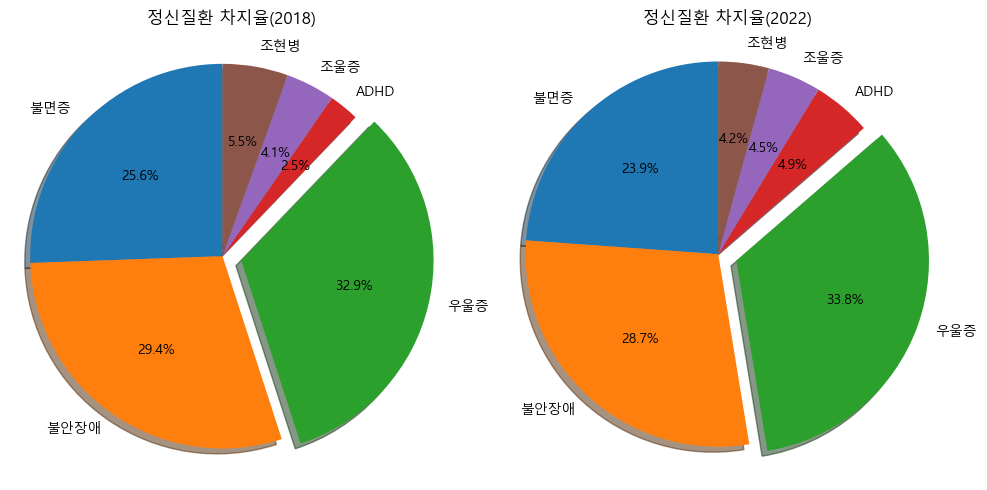

In [17]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
labels = ['불면증', '불안장애', '우울증', 'ADHD', '조울증', '조현병']
sizes = [years.loc['불면증',2018]/total, 
         years.loc['불안장애',2018]/total, 
         years.loc['우울증',2018]/total,
         years.loc['ADHD',2018]/total,
         years.loc['조울증',2018]/total,
         years.loc['조현병',2018]/total] # 백분율
explode = (0, 0, 0.1, 0, 0 ,0) # 돌출
plt.title("정신질환 차지율(2018)")
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.subplot(1,2,2)
labels = ['불면증', '불안장애', '우울증', 'ADHD', '조울증', '조현병']
sizes = [years.loc['불면증',2022]/total, 
         years.loc['불안장애',2022]/total, 
         years.loc['우울증',2022]/total,
         years.loc['ADHD',2022]/total,
         years.loc['조울증',2022]/total,
         years.loc['조현병',2022]/total] # 백분율
explode = (0, 0, 0.1, 0, 0 ,0) # 돌출
plt.title("정신질환 차지율(2022)")
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.tight_layout()
plt.show()

- 위 차트를 보면 비율의 변화가 크지는 않지만 ADHD가 크게 증가하여 조현병과 조울증보다 비율이 커졌고
- 다른 정신질환은 비율의 큰 변화가 보이지 않으며 가장 흔한 질병으로는 우우증, 불안장애, 불면증으로 보임

# 비용이 많이 들어가는 질병

요양급여비용이란
- 요양기관에서 환자 진료에 대한 비용를 청구하는 서식으로 환자정보, 진료정보, 비용정보 등 

In [18]:
df2 = pd.concat([df.groupby(df.상별구분)['요양급여비용'].sum(), df.groupby(df.상별구분)[['환자수']].sum()], axis=1).sort_values(by='요양급여비용')
df2

,요양급여비용,환자수
상별구분,,
ADHD,265565672420,502774
불면증,379991421530,3549496
조울증,573922768940,620314
불안장애,1079272821730,4132425
조현병,1934305345760,690800
우울증,2137336927040,4720207


In [19]:
pd.options.display.float_format = '{:.2f}'.format # 숫자표기 변경
(df2.요양급여비용 / df2.환자수).sort_values() # 조현병이 제일 인당 280만원으로 비용이 크게 들어감

상별구분
불면증     107055.04
불안장애    261171.79
우울증     452805.76
ADHD    528200.89
조울증     925213.31
조현병    2800094.59
dtype: float64

# 연령에 따른 질병비용

In [20]:
age_spend = df.groupby('연령구분')['환자수', '요양급여비용'].sum()
age_spend

,환자수,요양급여비용
연령구분,,
0~9세,160054,74050103550
10~19세,689778,402345409830
20~29세,1828473,1016405840320
30~39세,1829280,974469299890
40~49세,2095411,1057449704330
50~59세,2366219,1085794938410
60~69세,2398331,974148488330
70~79세,1859891,566181517490
80~89세,914088,205432821510


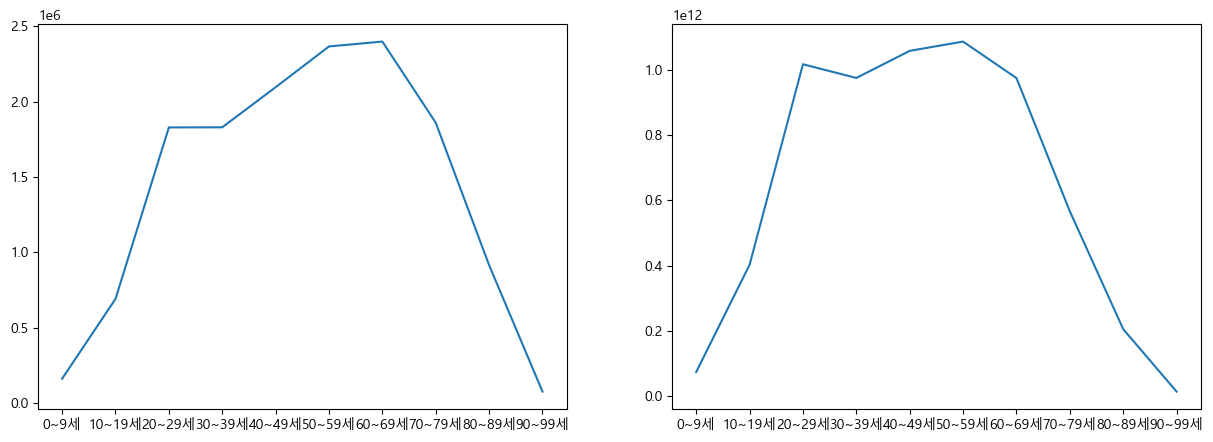

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(age_spend.환자수)
plt.subplot(1,2,2)
plt.plot(age_spend.요양급여비용)
plt.show()

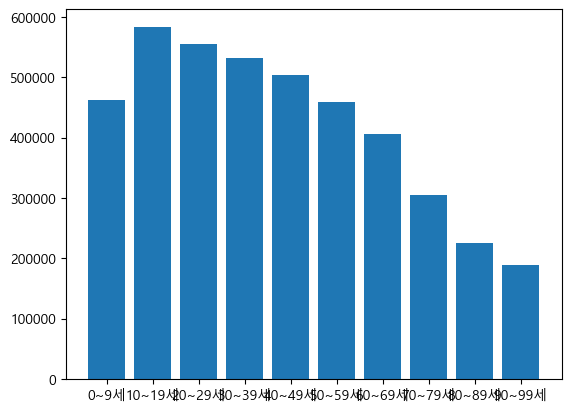

In [22]:
plt.bar(age_spend.index, age_spend.요양급여비용/age_spend.환자수)
plt.show()

- 대체적으로 연령과 상관없이 비용은 환자수가 많을수록 많이 들어가는 것으로 보임
- 연령별 인당 요양급여비용이 나이가 들수록 비용이 줄어드는 것을 확인할 수 있음. 아마 이는 사회복지의 역할이 잘 하고 있는 것으로 보임.

# 성별에 따른 질병 진단율

In [23]:
df2 = df.groupby([df.성별, df.연령구분])[['환자수']].sum().unstack() # 여성이 더 많은 질병발병율이 높아보임
df2

환자수                                                                \
연령구분    0~9세  10~19세   20~29세   30~39세   40~49세   50~59세   60~69세   70~79세   
성별                                                                           
남     128382  352718   737742   712174   831974   859026   827881   675292   
여      31672  337060  1090731  1117106  1263437  1507193  1570450  1184599   

                     
연령구분  80~89세 90~99세  
성별                   
남     318811  16282  
여     595277  58209

In [24]:
df2['환자수'].loc['남'].reset_index().to_numpy()[:,1]

array([128382, 352718, 737742, 712174, 831974, 859026, 827881, 675292,
       318811, 16282], dtype=object)

In [25]:
df2['환자수'].loc['남'].reset_index().to_numpy()[:,0]


array(['0~9세', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세',
       '70~79세', '80~89세', '90~99세'], dtype=object)

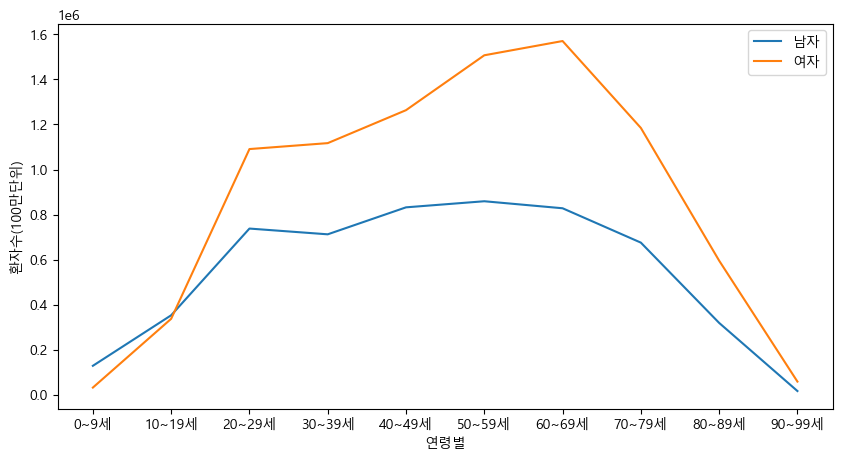

In [26]:
plt.figure(figsize=(10,5))
plt.plot(df2['환자수'].loc['남'].reset_index().to_numpy()[:,1])
plt.plot(df2['환자수'].loc['여'].reset_index().to_numpy()[:,1])
plt.ylabel('환자수(100만단위)')
plt.xlabel('연령별')
plt.legend(['남자', '여자'])
plt.xticks([0,1,2,3,4,5,6,7,8,9],df2['환자수'].loc['남'].reset_index().to_numpy()[:,0])
plt.show()

In [27]:
df3 = df.groupby([df.성별, df.상별구분])[['환자수']].sum().unstack()
df3

환자수                                           
상별구분    ADHD      불면증     불안장애      우울증     조울증     조현병
성별                                                     
남     367367  1385279  1614790  1539661  243631  309554
여     135407  2164217  2517635  3180546  376683  381246

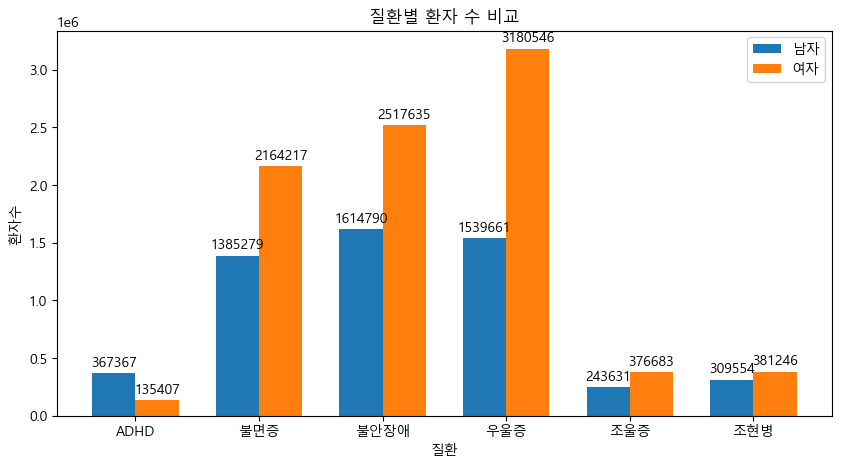

In [28]:
val1 = df3['환자수'].loc['남'].reset_index().to_numpy()[:,1]
val2 = df3['환자수'].loc['여'].reset_index().to_numpy()[:,1]
labels = df3['환자수'].loc['남'].reset_index().to_numpy()[:,0]
x = np.arange(len(labels))  # X축 위치 설정
width = 0.35  # 막대 폭

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, val1, width, label='남자')
bars2 = ax.bar(x + width/2, val2, width, label='여자')

ax.set_ylabel('환자수')
ax.set_xlabel('질환')
ax.set_title('질환별 환자 수 비교')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

- 위의 결과를 보면 여성의 정신병 환자수가 훨씬 많은 것을 알 수 있으며 
- 노년층에 해당하는 60~69세에 특히 정신병 환자수가 절정에 달하는 것을 알 수 있음
- 남성의 경우 여성에 비해 ADHD를 차지하는 비율이 훨씬 높음. 아마 남성이 더 활동성이 높다는 점에서 기인한 게 아닐까 싶기도 함...

# 지역에 따른 질환발생률

In [118]:
print(df.시도.unique())
patient = df.groupby('시도')[['환자수']].sum().reset_index()
patient.shape

['서울' '부산' '인천' '대구' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주' '세종']


(17, 2)

In [80]:
# 통계청 인구 데이터
people_cnt = pd.read_csv('mental\행정구역_시군구_별__성별_인구수_20240531145403.csv')
cnt2018 = people_cnt.loc[0:,['행정구역(시군구)별','2018.12']].drop([0,1]).reset_index(drop=True)
cnt2018.columns = ['시도', '인구수']
cnt2018.시도 = ['서울','부산','대구','인천','광주','대전','울산','세종','경기','강원','충북','충남','전북','전남','경북','경남','제주']
cnt2018.인구수 = cnt2018.인구수.map(int)
cnt2018.shape

(17, 2)

In [81]:
patient2018 = pd.merge(cnt2018, patient)
patient2018['비율'] = patient2018.환자수 / patient2018.인구수
patient2018.sort_values('인구수', ascending=False).reset_index(drop=True, inplace=True)
patient2018.sort_values('비율')

,시도,인구수,환자수,비율
13,전남,1882970,363007,0.19
14,경북,2676831,594321,0.22
6,울산,1155623,256783,0.22
7,세종,314126,70057,0.22
15,경남,3373988,764595,0.23
3,인천,2954642,719175,0.24
12,전북,1836832,453726,0.25
4,광주,1459336,365955,0.25
8,경기,13077153,3300170,0.25
9,강원,1543052,394346,0.26


- 2018년도 데이터로 봤을 때 지역에 따른 질병앓는 비율은 인구에 따라 높낮이가 보이지 않음
- 추가적으로 인구는 18년도의 인구변화 평균으로 인구를 추산하였으며 환자수는 1년간 여러사람이 중복되는 데이터가 포함되어있을 <strong>가능성이 높으므로</strong> 인구에 비해 얼마나 많은 환자의 방문이 있었는가로 봐야함

# 지역에 따른 요양급여비용

In [82]:
spend_region = df.groupby('시도')['요양급여비용','환자수'].sum()
spend_region['평균비용'] = spend_region.요양급여비용/spend_region.환자수
spend_region.sort_values('평균비용', inplace=True)
spend_region

,요양급여비용,환자수,평균비용
시도,,,
세종,23239245450,70057,331719.11
제주,66055239680,172955,381921.54
대전,187569171990,479500,391176.58
강원,157816768660,394346,400198.73
충북,170717775110,420255,406224.26
울산,112180585820,256783,436869.21
서울,1475401637890,3376563,436953.68
충남,239944238450,548196,437697.90
전북,202408804050,453726,446103.60


In [34]:
spend_region.index

Index(['세종', '제주', '대전', '강원', '충북', '울산', '서울', '충남', '전북', '경북', '전남', '경기',
       '대구', '인천', '경남', '부산', '광주'],
      dtype='object', name='시도')

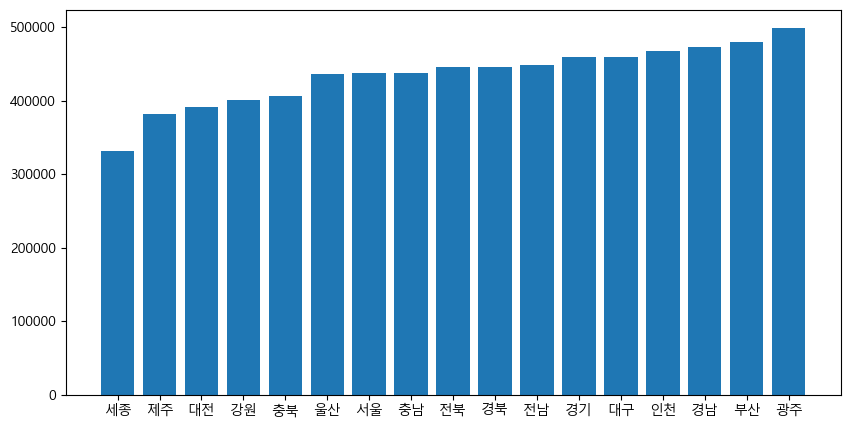

In [83]:
plt.figure(figsize=(10,5))
plt.bar(spend_region.index, spend_region.평균비용)
plt.show()

- 가장 인당 요양급여비용이 낮은 곳은 세종, 이어서 제주, 대전, 강원, 충북 등으로 구성
- 가장 비싼곳은 광주이며, 부산, 경남, 인천, 대구 등
- 분명 세종은 출산율도 국내에서 제일 높았던 것으로 기억하는데 이와 연관이 있을지도 모름

In [112]:
bear = pd.read_csv('mental/시도_합계출산율__모의_연령별_출산율_20240531155819.csv')
bear.drop(0, inplace=True)
bear = bear.loc[1:, ['시도별','2018']]
bear.sort_values('2018', ascending=False, inplace=True)
bear

,시도별,2018
8,세종특별자치시,1.566
14,전라남도,1.240
17,제주특별자치도,1.220
12,충청남도,1.186
11,충청북도,1.172
15,경상북도,1.167
7,울산광역시,1.131
16,경상남도,1.122
10,강원도,1.067
13,전라북도,1.044


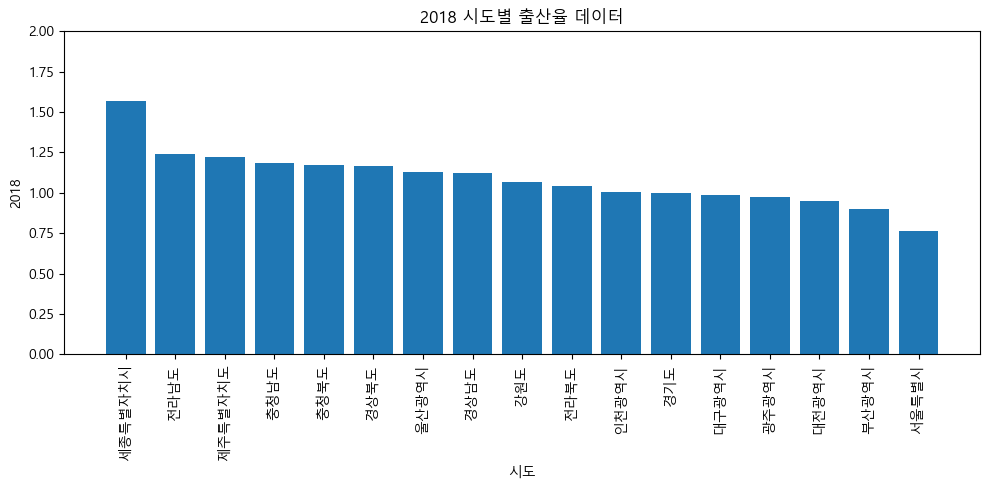

In [119]:
bear['2018'] = pd.to_numeric(bear['2018'])

plt.figure(figsize=(10, 5))
plt.bar(bear['시도별'], bear['2018'])
plt.ylim(0, 2)
plt.xticks(rotation=90)
plt.xlabel('시도')
plt.ylabel('2018')
plt.title('2018 시도별 출산율 데이터')
plt.tight_layout()

plt.show()

In [66]:
arr1 = np.array(spend_region.index)
arr1

array(['세종', '제주', '대전', '강원', '충북', '울산', '서울', '충남', '전북', '경북', '전남',
       '경기', '대구', '인천', '경남', '부산', '광주'], dtype=object)

In [91]:
arr2 = np.array(bear.시도별)
arr2
arr2 = np.array(['세종', '전남', '제주', '충남', '충북', '경북', '울산',
       '경남', '강원', '전북', '인천', '경기', '대구', '광주', '대전',
       '부산', '서울'])
arr1[arr1 == arr2] 

array(['세종', '충북', '경기', '대구', '부산'], dtype=object)

- 순위가 맞는 것이 몇개 없는 것으로 보아 출산율과는 복지상태의 관계성이 크게 높지 않을 수도 있음..

# 입내원일수 최대일수 및 최소일수

In [40]:
pd.concat([df.groupby(df.상별구분)['입내원일수'].max(), df.groupby(df.상별구분)[['입내원일수']].min()], axis=1)

,입내원일수,입내원일수
상별구분,,
ADHD,16316,0
불면증,13399,0
불안장애,15458,0
우울증,48418,0
조울증,14223,0
조현병,15876,0


위의 값은 여러명의 인원이 총합으로 입원한 기간이므로 사실 인당 어느정도의 기간을 입원해 있었는지 명확히 판단할 수 없음

In [41]:
df.head()

,진료년도,상별구분,시도,시군구,성별,연령구분,환자수,입내원일수,요양급여비용
0,2018,ADHD,서울,강남구,남,0~9세,437,3330,188836790
1,2018,ADHD,서울,강남구,남,10~19세,1111,8869,563498480
2,2018,ADHD,서울,강남구,남,20~29세,456,3485,213248290
3,2018,ADHD,서울,강남구,남,30~39세,174,1357,72761750
4,2018,ADHD,서울,강남구,남,40~49세,55,357,21611080


In [42]:
df[['상별구분','환자수', '입내원일수']]

,상별구분,환자수,입내원일수
0,ADHD,437,3330
1,ADHD,1111,8869
2,ADHD,456,3485
3,ADHD,174,1357
4,ADHD,55,357
...,...,...,...
164994,조현병,41,1647
164995,조현병,29,597
164996,조현병,13,550
164997,조현병,0,0


In [43]:
# 질병별 환자수 및 입내원일수
df4 = df.groupby('상별구분')['환자수', '입내원일수'].sum()
df4

,환자수,입내원일수
상별구분,,
ADHD,502774,3742737
불면증,3549496,13317109
불안장애,4132425,22018186
우울증,4720207,34951297
조울증,620314,6987636
조현병,690800,21455154


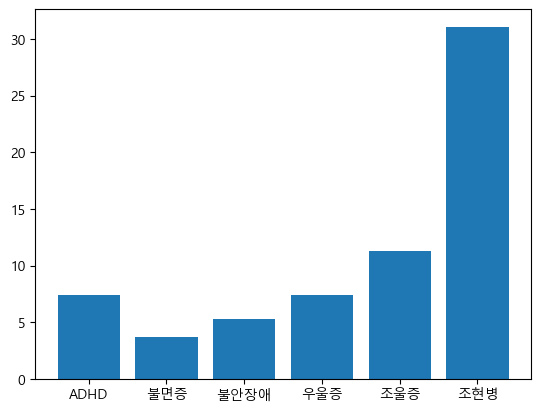

In [44]:
plt.bar(df4.index, df4.입내원일수/df4.환자수)
plt.show()

- 인당 입내원일수가 조현병이 가장 긴 편임을 알 수 있음